Week1/fashion_MNIST//Lingala_Bayanna_Siddhartha_Reddy/200968016

In [1]:
#dataset = fashion MNIST 
# This is a dataset of 60,000 28x28 grayscale images of 10 fashion categories, along with a test set of 10,000 images. This dataset can be used as a drop-in replacement for MNIST.

# The classes are:

# Label	Description
# 0	T-shirt/top
# 1	Trouser
# 2	Pullover
# 3	Dress
# 4	Coat
# 5	Sandal
# 6	Shirt
# 7	Sneaker
# 8	Bag
# 9	Ankle boot

In [2]:
#importing requried lib's , dataset
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

fashion=tf.keras.datasets.fashion_mnist
(x_train,y_train),(x_test,y_test)=fashion.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [3]:
y_train[0]

9

In [4]:
# 1>finding number of classes
classes=np.unique(y_train)
print(classes)

[0 1 2 3 4 5 6 7 8 9]


In [5]:
np.size(classes)

10

There are 10 classes in the fashion dataset.

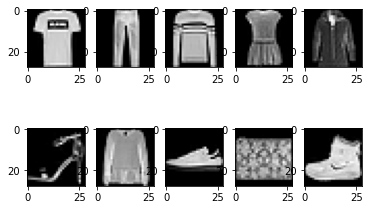

In [6]:
(x,id) = np.unique(y_train, return_index=True)

for i in range(10):
  plt.subplot(2,5,i+1) #rows, cols
  plt.imshow(x_train[id[i]],cmap="gray")

# Label	Description
# 0	T-shirt/top
# 1	Trouser
# 2	Pullover
# 3	Dress
# 4	Coat
# 5	Sandal
# 6	Shirt
# 7	Sneaker
# 8	Bag
# 9	Ankle boot

In [7]:
# 2>dimensions of each image
np.shape(x_train[0])

(28, 28)

In [8]:
# 4>perform normalization
max=np.max(x_train[0])
min=np.min(x_train[0])
print(min,max)

# a pixel ranges in between 0 and 255
x_train=x_train/255.0
x_test=x_test/255.0
# normalization

0 255


Buliding NN's 
1. 2 Hidden layers
2. 5 Hidden Layers

In [9]:
# 5.NN

model1=tf.keras.Sequential()
#Complete Biparte Graph - dense graph
model1.add(tf.keras.layers.Flatten(input_shape=[28,28],name="inputlayer"))
model1.add(tf.keras.layers.Dense(300,activation="relu",name="1sthiddenlayer"))
model1.add(tf.keras.layers.Dense(100,activation="relu",name="2ndhiddenlayer"))
model1.add(tf.keras.layers.Dense(10,activation="softmax",name="Output"))

model1.compile(loss="sparse_categorical_crossentropy",optimizer="SGD",metrics=["accuracy"])

#https://953894.smushcdn.com/2611031/wp-content/uploads/2020/12/Keras_Optimizers-min.gif?lossy=0&strip=1&webp=1
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputlayer (Flatten)        (None, 784)               0         
                                                                 
 1sthiddenlayer (Dense)      (None, 300)               235500    
                                                                 
 2ndhiddenlayer (Dense)      (None, 100)               30100     
                                                                 
 Output (Dense)              (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [10]:
history=model1.fit(x_train,y_train,batch_size=30,epochs=20,validation_split=0.15)

Epoch 1/20
1700/1700 [==============================] - 14s 8ms/step - loss: 0.7296 - accuracy: 0.7602 - val_loss: 0.5684 - val_accuracy: 0.7968
Epoch 2/20
1700/1700 [==============================] - 12s 7ms/step - loss: 0.4917 - accuracy: 0.8283 - val_loss: 0.5119 - val_accuracy: 0.8127
Epoch 3/20
1700/1700 [==============================] - 7s 4ms/step - loss: 0.4465 - accuracy: 0.8441 - val_loss: 0.4479 - val_accuracy: 0.8436
Epoch 4/20
1700/1700 [==============================] - 7s 4ms/step - loss: 0.4173 - accuracy: 0.8538 - val_loss: 0.4216 - val_accuracy: 0.8536
Epoch 5/20
1700/1700 [==============================] - 7s 4ms/step - loss: 0.3963 - accuracy: 0.8605 - val_loss: 0.3971 - val_accuracy: 0.8582
Epoch 6/20
1700/1700 [==============================] - 7s 4ms/step - loss: 0.3793 - accuracy: 0.8678 - val_loss: 0.3922 - val_accuracy: 0.8599
Epoch 7/20
1700/1700 [==============================] - 7s 4ms/step - loss: 0.3651 - accuracy: 0.8711 - val_loss: 0.3792 - val_accurac

In [11]:
model1.evaluate(x_test,y_test)
batch_size=30

313/313 [==============================] - 1s 3ms/step - loss: 0.3518 - accuracy: 0.8750


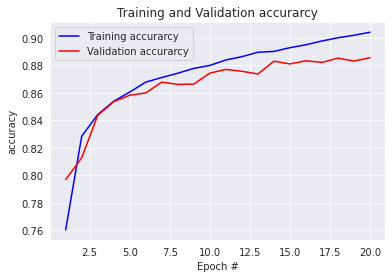

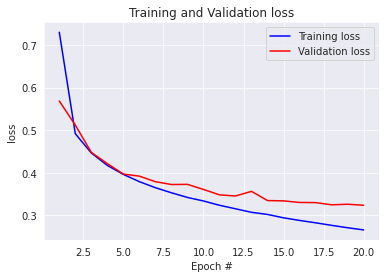

In [12]:
sns.set_style("darkgrid")
#get the details form the history object
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)


#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.xlabel('Epoch #')
plt.ylabel('accuracy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()


#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.xlabel('Epoch #')
plt.ylabel('loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

In [13]:
from sklearn.metrics import classification_report, confusion_matrix
Y_pred_mod1 = model1.predict(x_test, len(y_test)//batch_size)

In [14]:
y_pred_mod1 = np.argmax(Y_pred_mod1, axis=1)

In [15]:
print('Confusion Matrix')
cm = confusion_matrix(y_test, y_pred_mod1)
print(cm)

Confusion Matrix
[[891   0   7  28   3   1  56   0  14   0]
 [  5 963   0  25   4   0   2   0   1   0]
 [ 28   1 775  16  95   0  76   0   8   1]
 [ 32   4   8 907  24   1  18   0   6   0]
 [  1   1  89  39 792   0  72   0   6   0]
 [  0   0   0   1   0 961   0  19   2  17]
 [202   1  75  31  67   0 609   0  15   0]
 [  0   0   0   0   0  36   0 920   0  44]
 [  6   1   0   8   5   2   6   5 967   0]
 [  0   0   0   0   0   6   1  28   0 965]]


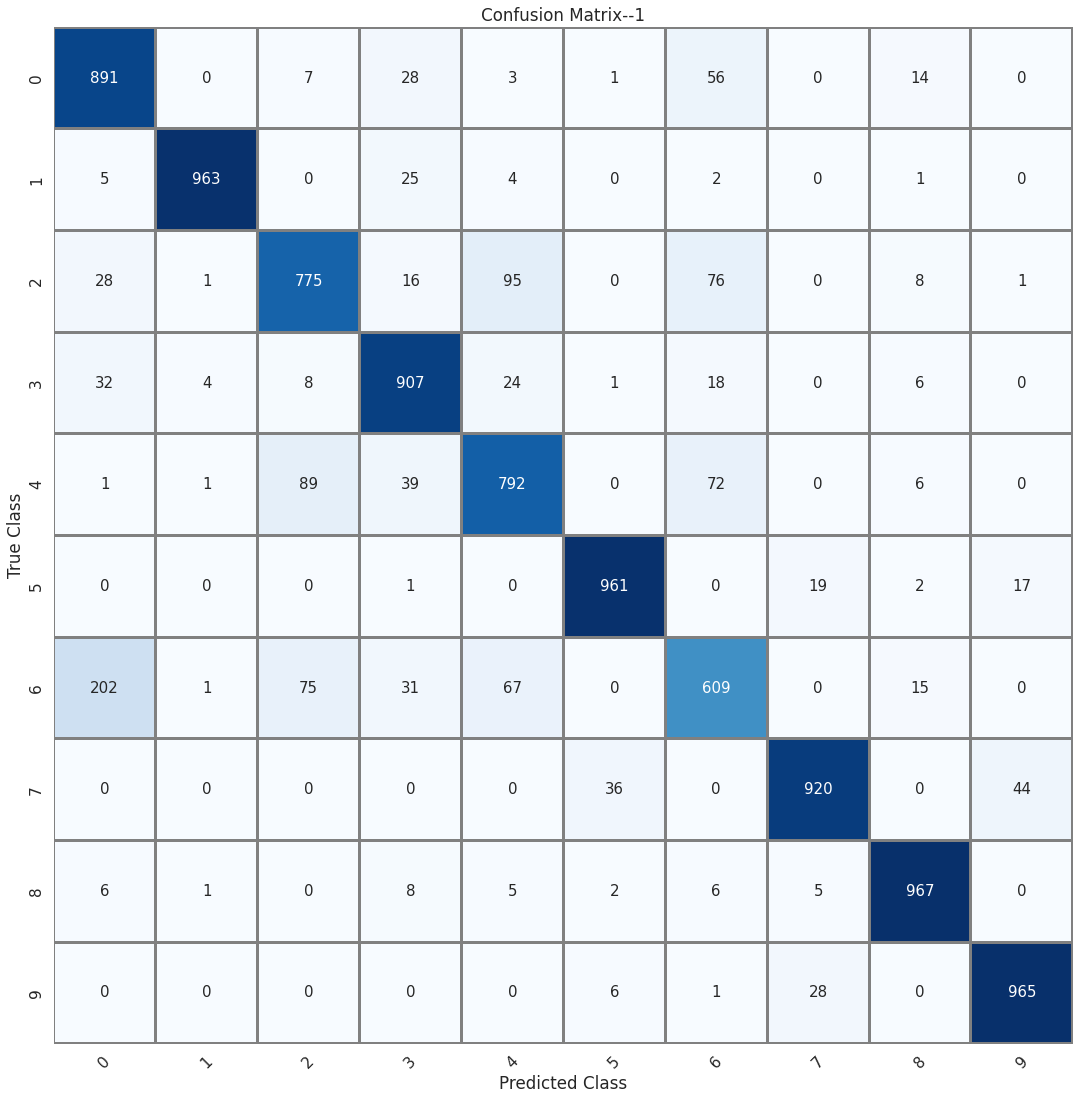

In [16]:
array_downsize_upsize_random = cm

class_labels=["0", "1","2","3","4","5","6","7","8","9"]
import pandas as pd

confusion_matrix = pd.DataFrame(array_downsize_upsize_random, index=class_labels, columns=class_labels)
plt.figure(figsize=(15,15))
sns.set(font_scale=1.4) # for label size
g = sns.heatmap(confusion_matrix, annot=True, annot_kws={"size": 15}, cmap=plt.cm.Blues, fmt="g", linewidths=2, linecolor='grey',cbar=False, yticklabels=class_labels,xticklabels=class_labels) # font size

g.set_xticklabels(g.get_xticklabels(), rotation = 45)#, fontsize = 1)
# accuracy = np.trace(array_downsize_upsize_random) / np.sum(array_downsize_upsize_random).astype('float')
# misclass = 1 - accuracy
plt.tight_layout()
plt.ylabel('True Class')
plt.xlabel('Predicted Class')#\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
plt.title("Confusion Matrix--1")
#plt.savefig('Downsize+Upsize_Random.png')#, dpi = 1200)
plt.show()

In [17]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_mod1)

0.875

Model 2 with 5 hidden Layers

In [18]:
model2=tf.keras.Sequential()
#Complete Biparte Graph - dense graph
model2.add(tf.keras.layers.Flatten(input_shape=[28,28],name="inputlayer"))
model2.add(tf.keras.layers.Dense(400,activation="relu",name="1sthiddenlayer"))
model2.add(tf.keras.layers.Dense(200,activation="relu",name="2ndhiddenlayer"))
model2.add(tf.keras.layers.Dense(100,activation="relu",name="3rdhiddenlayer"))
model2.add(tf.keras.layers.Dense(50,activation="relu",name="4thhiddenlayer"))
model2.add(tf.keras.layers.Dense(25,activation="relu",name="5thhiddenlayer"))
model2.add(tf.keras.layers.Dense(10,activation="softmax",name="Output"))

model2.compile(loss="sparse_categorical_crossentropy",optimizer="SGD",metrics=["accuracy"])

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputlayer (Flatten)        (None, 784)               0         
                                                                 
 1sthiddenlayer (Dense)      (None, 400)               314000    
                                                                 
 2ndhiddenlayer (Dense)      (None, 200)               80200     
                                                                 
 3rdhiddenlayer (Dense)      (None, 100)               20100     
                                                                 
 4thhiddenlayer (Dense)      (None, 50)                5050      
                                                                 
 5thhiddenlayer (Dense)      (None, 25)                1275      
                                                                 
 Output (Dense)              (None, 10)               

In [19]:
history=model2.fit(x_train,y_train,batch_size=30,epochs=20,validation_split=0.15)

Epoch 1/20
1700/1700 [==============================] - 10s 6ms/step - loss: 0.8246 - accuracy: 0.7106 - val_loss: 0.5192 - val_accuracy: 0.8164
Epoch 2/20
1700/1700 [==============================] - 10s 6ms/step - loss: 0.4838 - accuracy: 0.8304 - val_loss: 0.4802 - val_accuracy: 0.8353
Epoch 3/20
1700/1700 [==============================] - 10s 6ms/step - loss: 0.4219 - accuracy: 0.8494 - val_loss: 0.4088 - val_accuracy: 0.8553
Epoch 4/20
1700/1700 [==============================] - 10s 6ms/step - loss: 0.3873 - accuracy: 0.8608 - val_loss: 0.4200 - val_accuracy: 0.8519
Epoch 5/20
1700/1700 [==============================] - 10s 6ms/step - loss: 0.3626 - accuracy: 0.8691 - val_loss: 0.3757 - val_accuracy: 0.8668
Epoch 6/20
1700/1700 [==============================] - 10s 6ms/step - loss: 0.3427 - accuracy: 0.8752 - val_loss: 0.3487 - val_accuracy: 0.8776
Epoch 7/20
1700/1700 [==============================] - 9s 5ms/step - loss: 0.3267 - accuracy: 0.8803 - val_loss: 0.3445 - val_acc

In [20]:
model2.evaluate(x_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.3656 - accuracy: 0.8737


[0.3656233549118042, 0.8737000226974487]

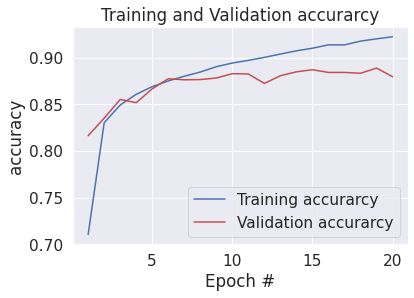

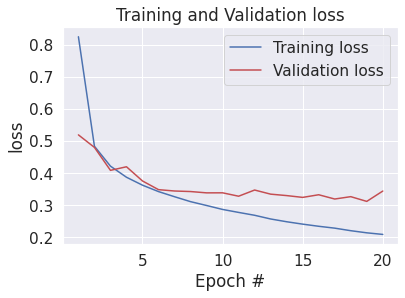

In [21]:
sns.set_style("darkgrid")
#get the details form the history object
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)


#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.xlabel('Epoch #')
plt.ylabel('accuracy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()


#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.xlabel('Epoch #')
plt.ylabel('loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

In [22]:
from sklearn.metrics import classification_report, confusion_matrix
Y_pred_mod2 = model2.predict(x_test, len(y_test)//batch_size)

In [23]:
y_pred_mod2 = np.argmax(Y_pred_mod2, axis=1)

In [24]:
print('Confusion Matrix')
cm = confusion_matrix(y_test, y_pred_mod1)
print(cm)

Confusion Matrix
[[891   0   7  28   3   1  56   0  14   0]
 [  5 963   0  25   4   0   2   0   1   0]
 [ 28   1 775  16  95   0  76   0   8   1]
 [ 32   4   8 907  24   1  18   0   6   0]
 [  1   1  89  39 792   0  72   0   6   0]
 [  0   0   0   1   0 961   0  19   2  17]
 [202   1  75  31  67   0 609   0  15   0]
 [  0   0   0   0   0  36   0 920   0  44]
 [  6   1   0   8   5   2   6   5 967   0]
 [  0   0   0   0   0   6   1  28   0 965]]


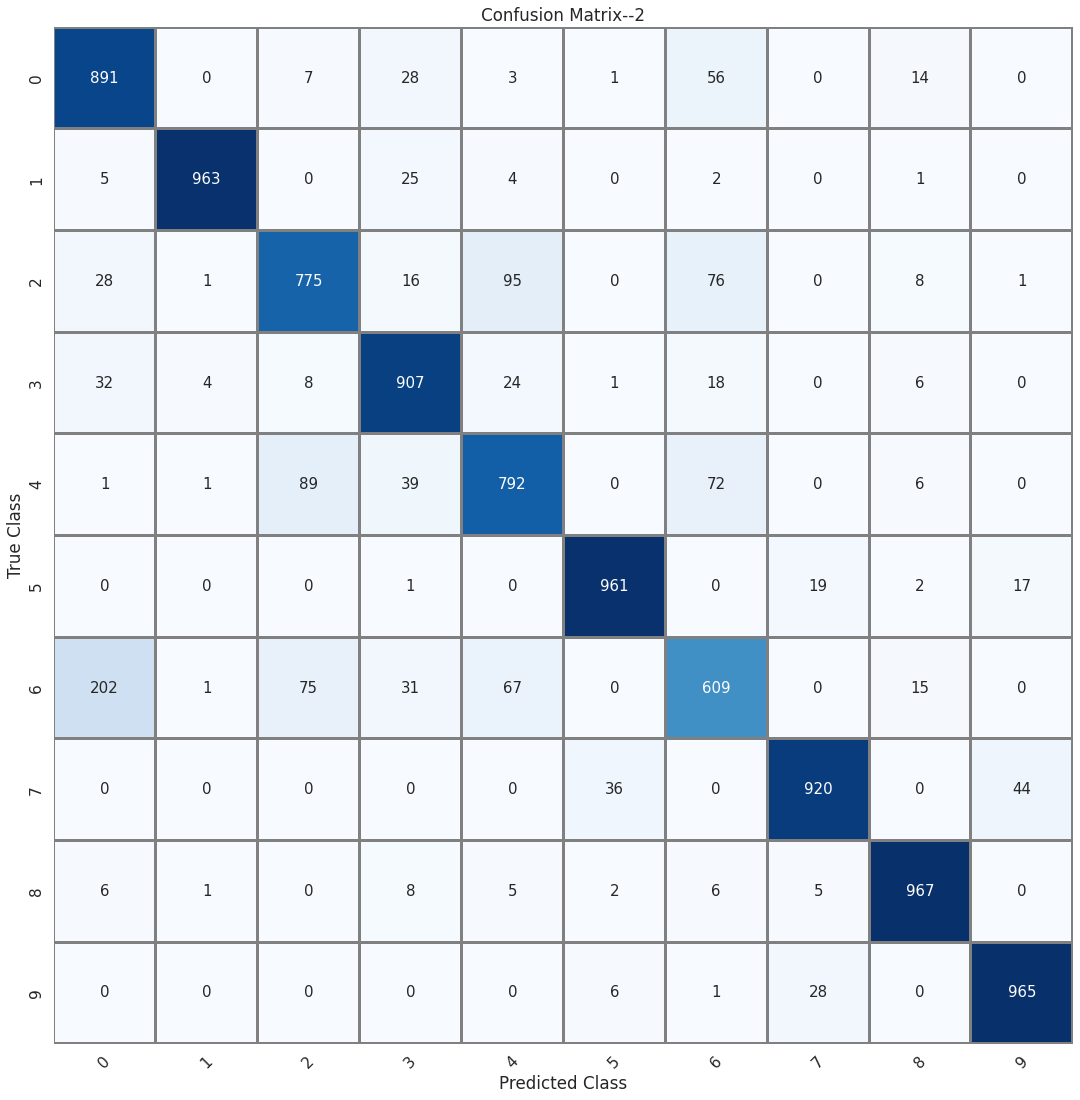

In [25]:
array_downsize_upsize_random = cm

class_labels=["0", "1","2","3","4","5","6","7","8","9"]
import pandas as pd

confusion_matrix = pd.DataFrame(array_downsize_upsize_random, index=class_labels, columns=class_labels)
plt.figure(figsize=(15,15))
sns.set(font_scale=1.4) # for label size
g = sns.heatmap(confusion_matrix, annot=True, annot_kws={"size": 15}, cmap=plt.cm.Blues, fmt="g", linewidths=2, linecolor='grey',cbar=False, yticklabels=class_labels,xticklabels=class_labels) # font size

g.set_xticklabels(g.get_xticklabels(), rotation = 45)#, fontsize = 1)
# accuracy = np.trace(array_downsize_upsize_random) / np.sum(array_downsize_upsize_random).astype('float')
# misclass = 1 - accuracy
plt.tight_layout()
plt.ylabel('True Class')
plt.xlabel('Predicted Class')#\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
plt.title("Confusion Matrix--2")
#plt.savefig('Downsize+Upsize_Random.png')#, dpi = 1200)
plt.show()

In [26]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_mod2)

0.8737

In [27]:
model1.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3518 - accuracy: 0.8750


[0.3518422842025757, 0.875]

In [28]:
model2.evaluate(x_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.3656 - accuracy: 0.8737


[0.3656233549118042, 0.8737000226974487]